<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

In [ ]:
Alumno: RICARDO ALONSO BUTRON BENITES

<center> <h1>MACHINE LEARNING</h1> </center> 
<center> <h1>K-MEANS</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****1. K-Means para Clasificación****<tfont>

<div class="alert alert-info">

El **clustering o agrupamiento** es una técnica que nos permite encontrar grupos de objetos similares, objetos que están más relacionados entre sí que con objetos de otros grupos. Ejemplos de aplicaciones de clustering orientadas al negocio incluyen la **agrupación de documentos, música y películas por diferentes temas, o la búsqueda de clientes** que compartan intereses similares basados en comportamientos de compra comunes como base para los motores de recomendación.

El algoritmo **K-Means** es extremadamente fácil de implementar y también es **computacionalmente muy eficiente** comparado con otros algoritmos de clustering, lo que podría explicar su popularidad. El algoritmo **K-Means** pertenece a la categoría de clustering basado en prototipos.



</div>

<img src="https://user-images.githubusercontent.com/19308295/125209815-342cfa00-e261-11eb-978b-b2edb14220e3.png" width="350" height="100" />

<div class="alert alert-info">

El **clustering basado en prototipos** significa que cada agrupación está representada por un prototipo, que puede ser el **centroide**, el promedio de puntos similares con características continuas, o el punto más representativo o más frecuente en el caso de rasgos categóricos.

Mientras que **K-Means** es muy bueno para identificar clústeres con forma esférica, una de las desventajas de este algoritmo de clustering es que tenemos que especificar el **número de clústeres**, **K**, a priori. Una elección inapropiada para **K** puede resultar en un pobre desempeño de clustering.

</div>

## Librerías a utilizar

In [2]:
#Se importan la librerias a utilizar
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importación de datos

El proyecto que vamos a desarrollar es de Conjunto de datos de plantas de iris, que se encuentra disponible en la librería scikit learn. 

Los datos esta almacenados en archivo `iris.csv` que se encuentra en el directorio `data`

In [4]:
#Importamos los datos de la misma librería de scikit-learn
dataset = pd.read_csv('Data/iris.csv',
names= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'Etiqueta'])

In [5]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Etiqueta
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Etiqueta
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


`ceros=setosa, unos=versicolor y dos=virginica`

Guardamos la columna `etiqueta` en variable `y`para verificar el aprendizaje del modelo

In [7]:
y = dataset[dataset.columns[-1]].to_numpy()

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Eliminamos la columna etiquetas

In [9]:
iris = dataset.drop(['Etiqueta'], axis =1)

In [10]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploración de datos

### Tamaño Dataframe

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [13]:
iris.shape

(150, 4)

In [14]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
iris.count()

Cantidad de datos:


sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

In [15]:
#Verifico los valores nulos
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
#Nombres de columnas
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [17]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Aqui se puede normalizar los datos para un mejor análisis**

In [18]:
iris_train = iris

In [19]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
iris_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Cantidad óptima de cluster

La técnica **“Codo de Jambú”** ayudará a encontrar el **número óptimo de cluster** a formar. 

In [21]:
wcss= [] #almacenara los valores de WCSS que va hallando
for i in range(1, 11): # 10 Cantidad de agrupaciones
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(iris_train) #Entrenamos Modelo KMeans a la base de datos
    wcss.append(kmeans.inertia_)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Graficamos los resultados **WCSS** para formar el Codo de Jambú

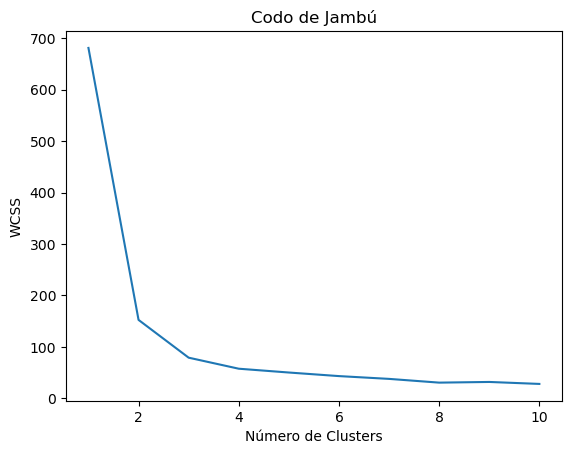

In [22]:
plt.plot(range(1,11), wcss)  
plt.title('Codo de Jambú')  
plt.xlabel('Número de Clusters')  
plt.ylabel('WCSS') #WCSS Es un indicador de que tan similar pueden ser los datos dentro de los cluster  
plt.show()  

## Aplicamos el modelo KMeans a la base de datos iris

In [23]:
clustering = KMeans(n_clusters = 3, max_iter = 300) # Creamos el modelo KMeans  
clustering.fit(iris_train) #Entrenamos el modelo con la base de datos iris

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## Agregamos la clasificación al archivo original

In [31]:
iris['KMeans_Cluster'] = clustering.labels_ #Los resultados del clustering se guardan en labels_ dentro del modelo
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Kmeans_Cluster,KMeans_Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [32]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Kmeans_Cluster,KMeans_Cluster
145,6.7,3.0,5.2,2.3,1,1
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,1,1
148,6.2,3.4,5.4,2.3,1,1
149,5.9,3.0,5.1,1.8,2,2


## Graficamos los clusters formados

Como son varias columnas caracteristicas, aplicamos el análisis de componentes principales `PCA` para darnos una idea de como se formaron los clusters.

`PCA`crea **nuevas variables** que **representan** de la mejor forma posible a **todas las variables.**

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #Modelo PCA de 2 dimensiones para graficar
pca_iris = pca.fit_transform(iris_train)
pca_iris_df = pd.DataFrame(data = pca_iris, columns = ['Componente_1', 'Componente_2'])
pca_nombre_iris = pd.concat([pca_iris_df, iris[['KMeans_Cluster']]], axis=1)

pca_nombre_iris


,Componente_1,Componente_2,KMeans_Cluster
0,-3.081555,-0.311828,0
1,-3.095841,-0.096827,0
2,-3.255431,-0.046406,0
3,-3.120994,-0.034058,0
4,-3.122350,-0.300140,0
...,...,...,...
145,1.710612,-0.942308,1
146,1.947829,0.625916,2
147,1.550895,-0.823906,1
148,1.672256,-0.910584,1


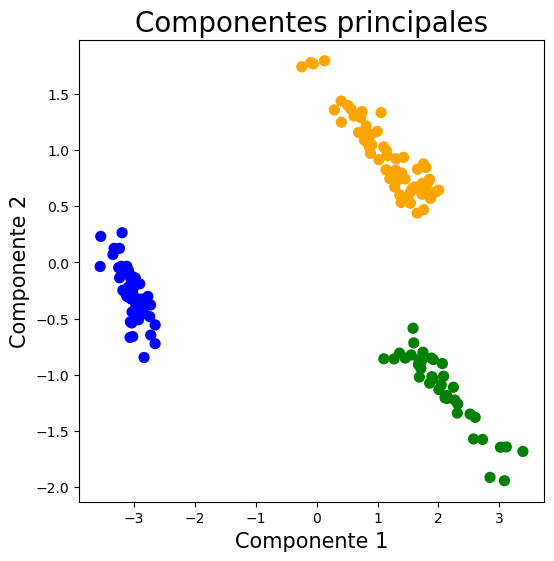

In [34]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)
color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(x = pca_nombre_iris.Componente_1, y = pca_nombre_iris.Componente_2,
           c=color_theme[pca_nombre_iris.KMeans_Cluster], s = 50)
plt.show()

## Verificación del modelo desarrollado

<div class="alert alert-info">

A llegado el momento de verificar que tan **preciso** es el modelo desarrollado para ello vamos a predecir, aqui no tenemos el mismo problema que Aprendizaje Supervisado, si podemos predecir sobre el mismo set de datos, en este caso `X`
    
    
<div>

In [35]:
predicciones = clustering.labels_

In [36]:
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

Utilizamos `metrics` para ver que tanto aprendio nuestro set de datos

In [38]:
from sklearn import metrics
score = metrics.adjusted_rand_score(y, predicciones)

In [39]:
print(score)

0.7163421126838476


![linea 2](https://user-images.githubusercontent.com/19308295/115926262-2fb62980-a448-11eb-8189-c2f10e499944.png)

## <font color=#33A5FF>****BIBLIOGRAFÍA****<tfont>

[1] Guía oficial scikit learn https://scikit-learn.org/stable/

[2] Datasets de Scikit Learn: https://scikit-learn.org/stable/datasets/toy_dataset.html

[3] Scikit Learn DecisionTreeClassifier : https://bit.ly/398XAIv

[4] Scikit Learn export_graphviz : https://bit.ly/2ZAbHDt

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)